# Problème 3

## Importer les outils

On commence par importer les bibliothèques nécessaire pour résoudre le problème avec python. Il vient:

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur


## Définir les constantes du problème

On commence à aborder le problème en définissant les constantes sur lesquelles se basent le problème.

In [0]:
CA0 = 1.5 #mol/l
CB0 = 2 #mol/l
Vdot = 10 #l/min
NA0 = CA0 * V #mol

FA0 = CA0 * Vdot
FB0 = CB0 * Vdot
FC0 = 0
FD0 = 0
FE0 = 0
FF0 = 0

## Définir les équations à résoudre

Les équations à résoudre sont définies dans une fonction prenant en paramètres les variables dépendantes (premier paramètre), la variable indépendante, et les différentes constantes utilisées par les équations.

In [0]:
def equations(variables, V, Vdot):
    """Fonction représentant les équations à résoudre."""
    CA, CB, CC, CD, CE, CF = variables
    
    r1 = 0.25 * CA * CB #mol/(l*min)
    r2 = 0.1 * CA * CD #mol/(l*min)
    r3 = 5 * (CB ** 2) * CC #mol/(l*min)
    
    RA = -r1 - 3 * r2
    RB = -2 * r1 -r3
    RC = r1 + r2 - 2 * r3
    RD = r1 - 2 * r2 + r3
    RE = r2
    RF = r3
    
    dFAdV = RA
    dFBdV = RB
    dFCdV = RC
    dFDdV = RD
    dFEdV = RE
    dFFdV = RF
    
    return dFAdV, dFBdV, dFCdV, dFDdV, dFEdV, dFFdV

## Définir les conditions initiales

Afin de résoudre ce type d'équations différentielles ordinaires, nous devons définir les conditions initiales du problème.

In [0]:
conditions_initiales = [FA0, FB0, FC0, FD0, FE0, FF0]

## Résoudre le problème à l'aide du solveur



In [0]:
V = np.linspace(0, 50, 5001) # définir les bornes d'intégration

# résolution du problème avec le solveur
resultats = solveur.odeint(
    equations, # 1er paramètre: la fonction contenant les équations à résoudre
    conditions_initiales, # 2e param: les conditions initiales
    V, # 3e param: les bornes d'intégration
    (Vdot,) # 4e param (optionnel): les constantes utilisées par les équations
)

On va récupérer les vecteurs associés à chaque variable de manière à pouvoir éventuellement les afficher séparemment.

In [0]:
FA = resultats[:,0]
FB = resultats[:,1]
FC = resultats[:,2]
FD = resultats[:,3]
FE = resultats[:,4]
FF = resultats[:,5]

##Taux de conversion

In [111]:
CA = FA / Vdot
NA = CA * V
XA = (NA0 - NA)/NA0
XA[V == 50] * 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([100.])

## Concentration de C

In [0]:
CC = FC/Vdot

## Visualiser les résultats



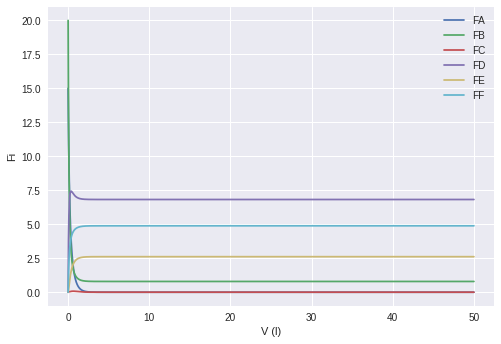

In [107]:
plt.figure(1)
plt.plot(V, FA, V, FB, V, FC, V, FD, V, FE, V, FF)
plt.xlabel('V (l)')
plt.ylabel('Fi')
plt.legend(['FA','FB','FC','FD', 'FE', 'FF'])
plt.show()

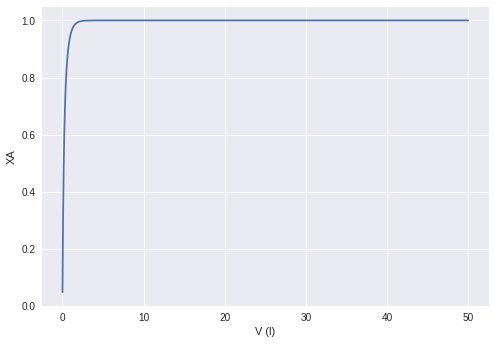

In [108]:
plt.figure(2)
plt.plot(V, XA )
plt.xlabel('V (l)')
plt.ylabel('XA')
plt.show()

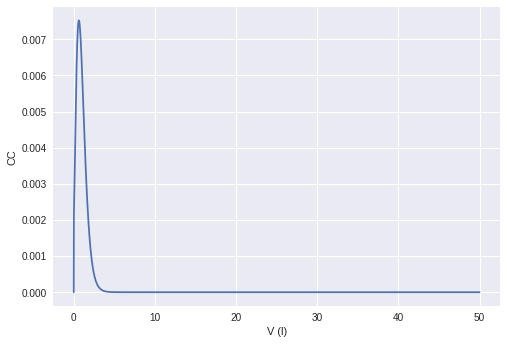

In [109]:
plt.figure(3)
plt.plot(V, CC )
plt.xlabel('V (l)')
plt.ylabel('CC')
plt.show()

In [110]:
CC[V == 50]

array([-3.93675587e-15])